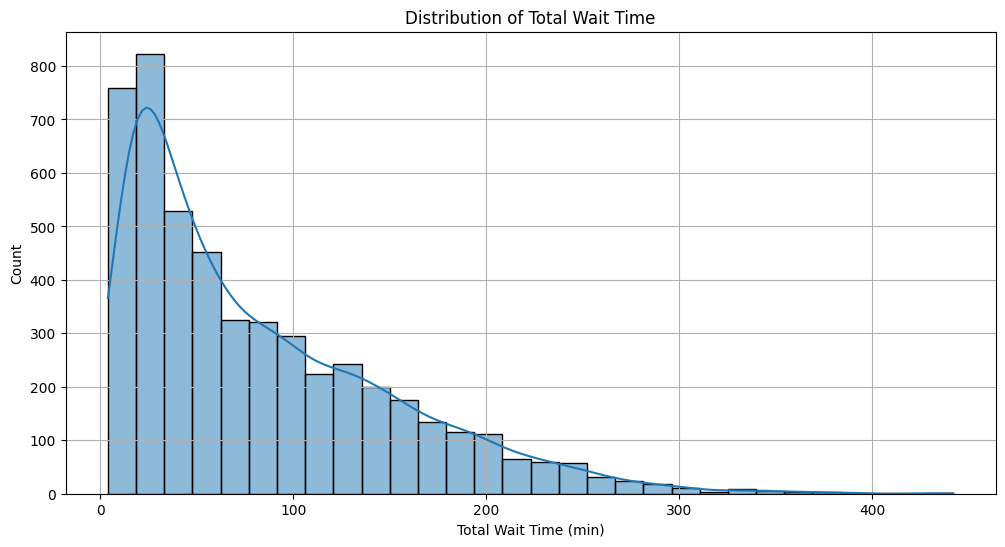

<ipython-input-2-3866229553>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_fe, x='Urgency Level', y='Total Wait Time (min)', palette='coolwarm')


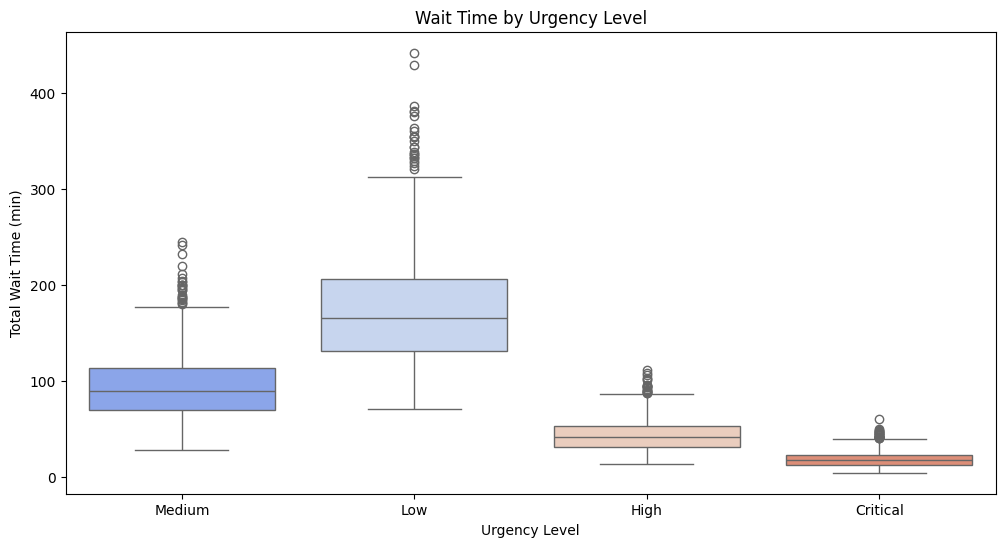

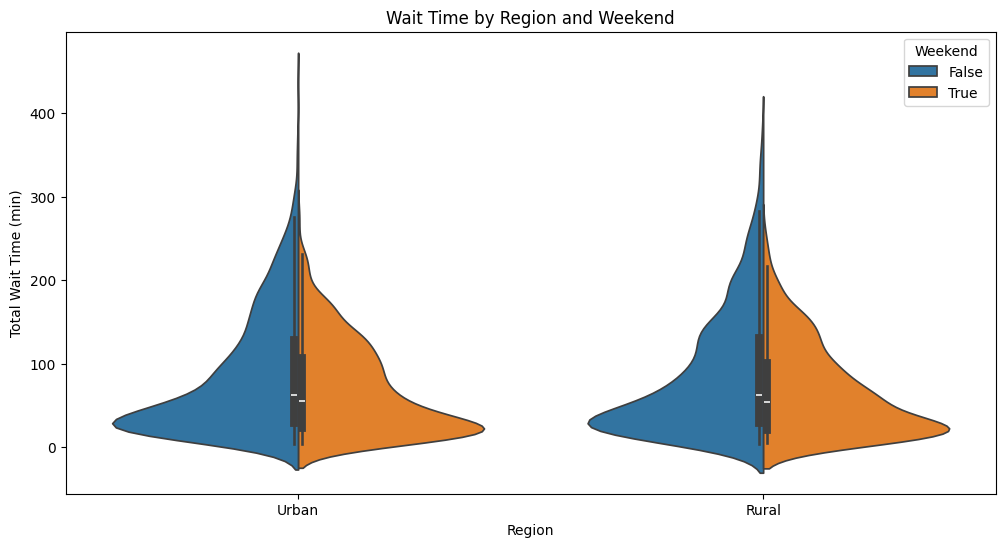

(5000, 28)

In [2]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/Optimizing healthcare datasets/ER Wait Time Dataset.csv")
# Make a fresh copy
df_fe = df.copy()

# --- Feature Engineering ---

# Convert date
df_fe['Visit Date'] = pd.to_datetime(df_fe['Visit Date'])
df_fe['Visit Hour'] = df_fe['Visit Date'].dt.hour
df_fe['Visit Month'] = df_fe['Visit Date'].dt.month
df_fe['Weekend'] = df_fe['Day of Week'].isin(['Saturday', 'Sunday'])

# Interaction features
df_fe['Beds per Specialist'] = df_fe['Facility Size (Beds)'] / (df_fe['Specialist Availability'] + 1e-5)
df_fe['Patients per Nurse'] = df_fe['Nurse-to-Patient Ratio']

# Drop ID-like columns
df_fe.drop(columns=['Visit ID', 'Patient ID', 'Hospital ID', 'Hospital Name', 'Visit Date'], inplace=True)

# --- Visualizations ---

plt.figure(figsize=(12, 6))
sns.histplot(df_fe['Total Wait Time (min)'], kde=True, bins=30)
plt.title('Distribution of Total Wait Time')
plt.xlabel('Total Wait Time (min)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_fe, x='Urgency Level', y='Total Wait Time (min)', palette='coolwarm')
plt.title('Wait Time by Urgency Level')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(data=df_fe, x='Region', y='Total Wait Time (min)', hue='Weekend', split=True)
plt.title('Wait Time by Region and Weekend')
plt.show()

# --- Preprocessing Pipeline ---

numerical_cols = [
    'Nurse-to-Patient Ratio', 'Specialist Availability', 'Facility Size (Beds)',
    'Time to Registration (min)', 'Time to Triage (min)', 'Time to Medical Professional (min)',
    'Visit Hour', 'Visit Month', 'Beds per Specialist', 'Patients per Nurse'
]

categorical_cols = [
    'Region', 'Day of Week', 'Season', 'Time of Day', 'Urgency Level', 'Weekend'
]

preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), numerical_cols),

    ('cat', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(drop='first'))  # <-- Fixed here
    ]), categorical_cols)
])

# Define X and y
X = df_fe.drop(columns=['Total Wait Time (min)', 'Patient Outcome', 'Patient Satisfaction'])
y = df_fe['Total Wait Time (min)']

# Fit-transform
X_transformed = preprocessor.fit_transform(X)

# Shape of final dataset
X_transformed.shape


In [3]:
# Convert transformed array to DataFrame
df_final = pd.DataFrame(X_transformed, columns=final_feature_names)

# Add target column back
df_final['Total Wait Time (min)'] = y.values

# Save to CSV
df_final.to_csv("Preprocessed_ER_WaitTime_Data.csv", index=False)


NameError: name 'final_feature_names' is not defined

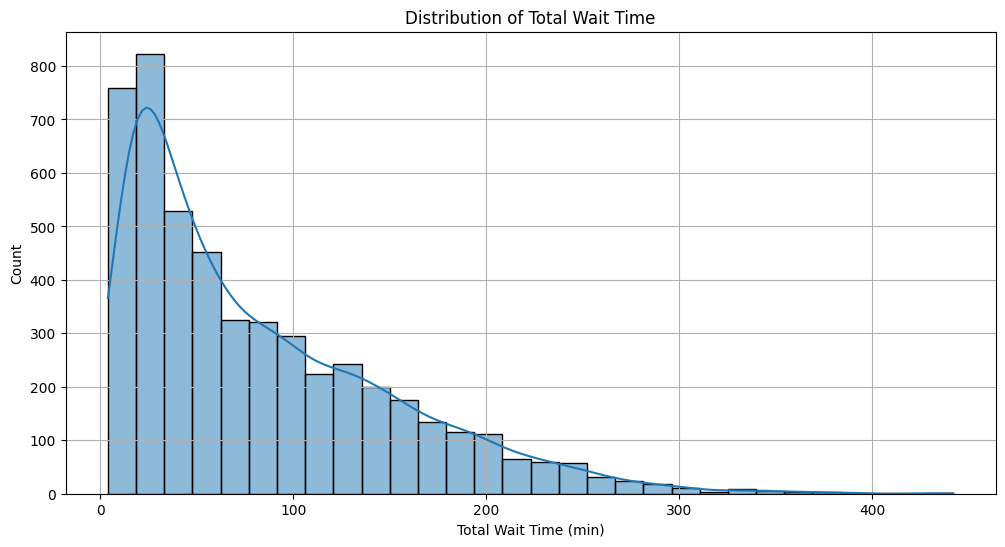

<ipython-input-4-1035634412>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_fe, x='Urgency Level', y='Total Wait Time (min)', palette='coolwarm')


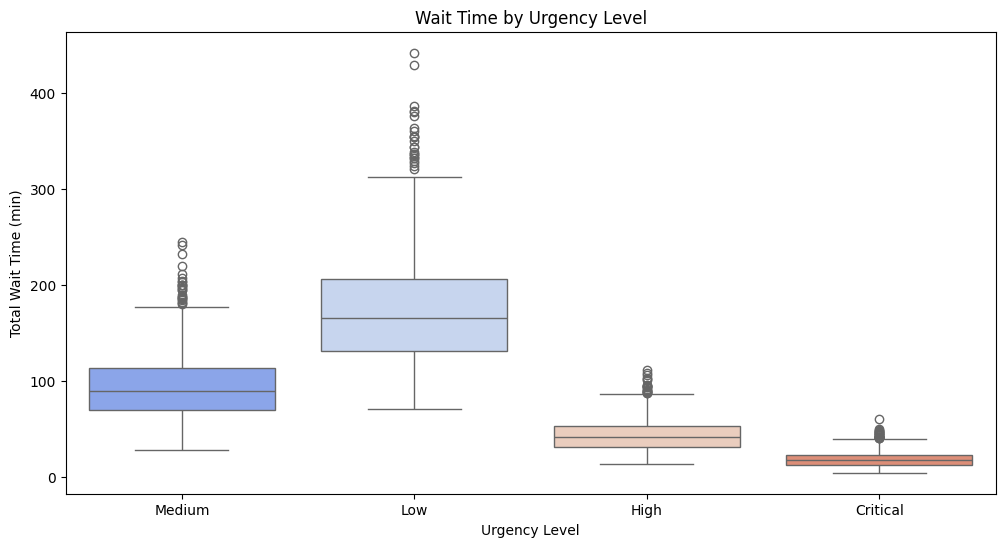

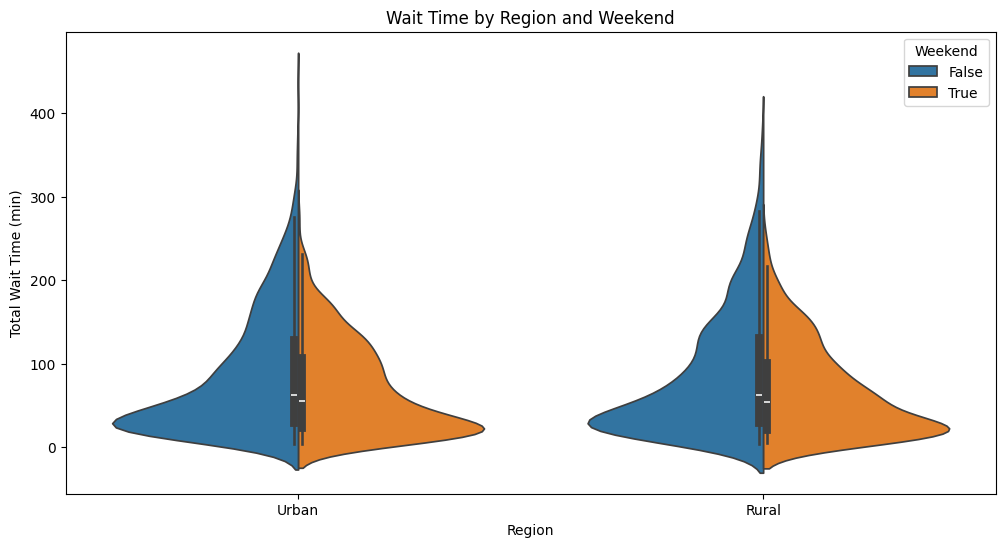

Dataset saved as 'Preprocessed_ER_WaitTime_Data.csv'


In [4]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Optimizing healthcare datasets/ER Wait Time Dataset.csv")

# Make a fresh copy
df_fe = df.copy()

# --- Feature Engineering ---

# Convert date
df_fe['Visit Date'] = pd.to_datetime(df_fe['Visit Date'])
df_fe['Visit Hour'] = df_fe['Visit Date'].dt.hour
df_fe['Visit Month'] = df_fe['Visit Date'].dt.month
df_fe['Weekend'] = df_fe['Day of Week'].isin(['Saturday', 'Sunday'])

# Interaction features
df_fe['Beds per Specialist'] = df_fe['Facility Size (Beds)'] / (df_fe['Specialist Availability'] + 1e-5)
df_fe['Patients per Nurse'] = df_fe['Nurse-to-Patient Ratio']

# Drop ID-like columns
df_fe.drop(columns=['Visit ID', 'Patient ID', 'Hospital ID', 'Hospital Name', 'Visit Date'], inplace=True)

# --- Visualizations ---

plt.figure(figsize=(12, 6))
sns.histplot(df_fe['Total Wait Time (min)'], kde=True, bins=30)
plt.title('Distribution of Total Wait Time')
plt.xlabel('Total Wait Time (min)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_fe, x='Urgency Level', y='Total Wait Time (min)', palette='coolwarm')
plt.title('Wait Time by Urgency Level')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(data=df_fe, x='Region', y='Total Wait Time (min)', hue='Weekend', split=True)
plt.title('Wait Time by Region and Weekend')
plt.show()

# --- Preprocessing Pipeline ---

numerical_cols = [
    'Nurse-to-Patient Ratio', 'Specialist Availability', 'Facility Size (Beds)',
    'Time to Registration (min)', 'Time to Triage (min)', 'Time to Medical Professional (min)',
    'Visit Hour', 'Visit Month', 'Beds per Specialist', 'Patients per Nurse'
]

categorical_cols = [
    'Region', 'Day of Week', 'Season', 'Time of Day', 'Urgency Level', 'Weekend'
]

preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), numerical_cols),

    ('cat', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(drop='first'))  # for older scikit-learn versions
    ]), categorical_cols)
])

# Define X and y
X = df_fe.drop(columns=['Total Wait Time (min)', 'Patient Outcome', 'Patient Satisfaction'])
y = df_fe['Total Wait Time (min)']

# Fit-transform the pipeline
X_transformed = preprocessor.fit_transform(X)

# --- Get feature names for transformed data ---
# Get names from OneHotEncoder
ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)

# Combine numerical and encoded categorical feature names
final_feature_names = numerical_cols + list(ohe_feature_names)

# Convert transformed data to DataFrame
df_final = pd.DataFrame(X_transformed.toarray() if hasattr(X_transformed, "toarray") else X_transformed,
                        columns=final_feature_names)

# Add target column
df_final['Total Wait Time (min)'] = y.values

# Save to CSV
df_final.to_csv("/content/drive/MyDrive/Optimizing healthcare datasets/Preprocessed_ER_WaitTime_Data.csv", index=False)

print("Dataset saved as 'Preprocessed_ER_WaitTime_Data.csv'")


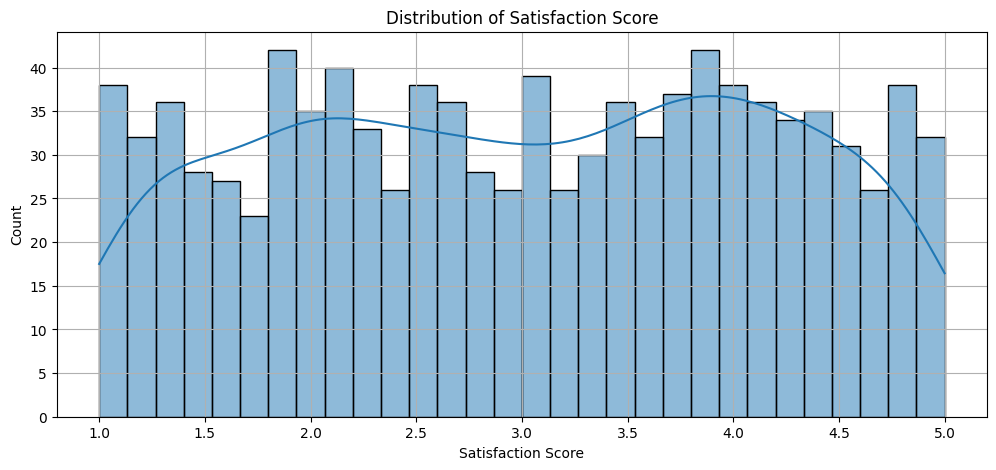

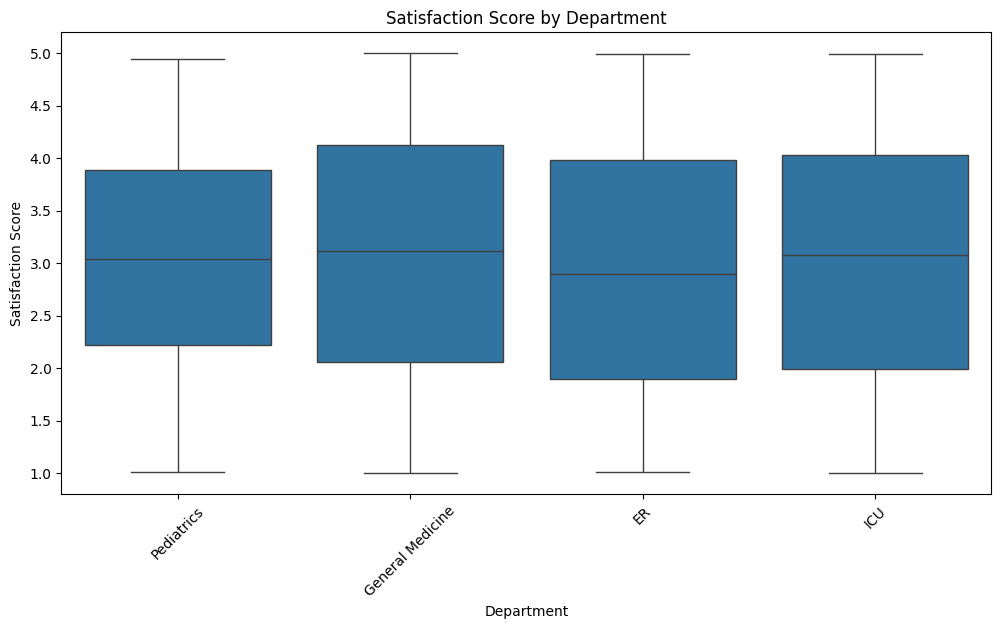

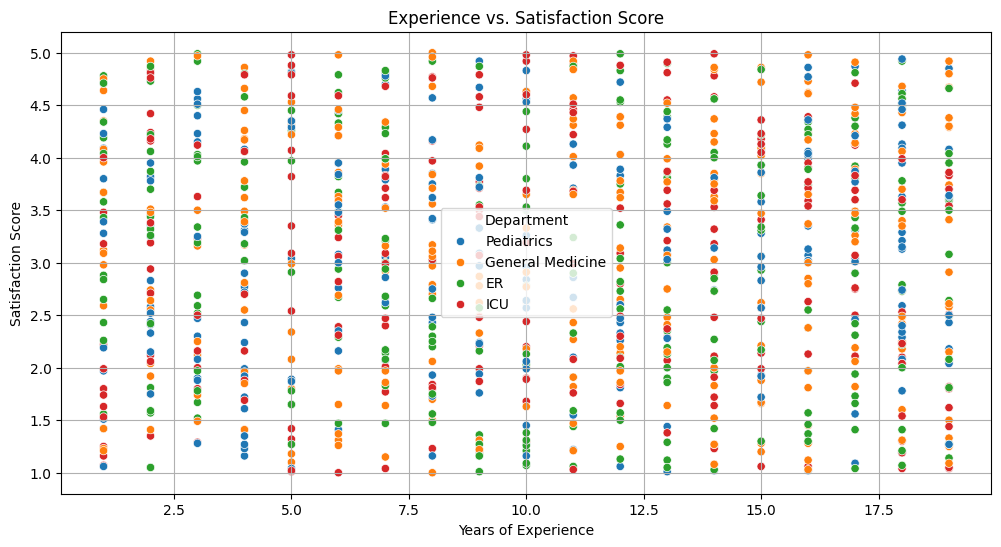

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load dataset
df_staff = pd.read_csv("/content/drive/MyDrive/Optimizing healthcare datasets/staff_scheduling_dataset.csv")

# Make a copy
df_fe_staff = df_staff.copy()

# --- Feature Engineering ---

# Drop ID column
df_fe_staff.drop(columns=['Staff ID'], inplace=True)

# Overtime ratio
df_fe_staff['Overtime Ratio'] = df_fe_staff['Overtime Hours'] / (df_fe_staff['Shift Duration (Hours)'] + 1e-5)

# Experience level categorization
df_fe_staff['Experience Level'] = pd.cut(df_fe_staff['Years of Experience'],
                                         bins=[0, 5, 10, 20, np.inf],
                                         labels=['Novice', 'Intermediate', 'Experienced', 'Veteran'])

# Satisfaction change from last review
df_fe_staff['Satisfaction Change'] = (
    df_fe_staff['Satisfaction Score'] - df_fe_staff['Previous Satisfaction Rating']
)

# --- Visualizations ---

plt.figure(figsize=(12, 5))
sns.histplot(df_fe_staff['Satisfaction Score'], kde=True, bins=30)
plt.title('Distribution of Satisfaction Score')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_fe_staff, x='Department', y='Satisfaction Score')
plt.title('Satisfaction Score by Department')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_fe_staff, x='Years of Experience', y='Satisfaction Score', hue='Department')
plt.title('Experience vs. Satisfaction Score')
plt.grid(True)
plt.show()

# --- Preprocessing Pipeline ---

numerical_cols = [
    'Shift Duration (Hours)', 'Patient Load', 'Workdays per Month', 'Satisfaction Score',
    'Overtime Hours', 'Years of Experience', 'Previous Satisfaction Rating',
    'Absenteeism (Days)', 'Overtime Ratio', 'Satisfaction Change'
]

categorical_cols = ['Department', 'Experience Level']

preprocessor_staff = ColumnTransformer(transformers=[
    ('num', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), numerical_cols),

    ('cat', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(drop='first'))
    ]), categorical_cols)
])

# Define feature set
X_staff = df_fe_staff.copy()

# Fit and transform the data
X_staff_transformed = preprocessor_staff.fit_transform(X_staff)

# Get final feature names
num_features = numerical_cols
cat_features = preprocessor_staff.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
final_feature_names_staff = list(num_features) + list(cat_features)

# Convert to DataFrame
df_staff_final = pd.DataFrame(X_staff_transformed, columns=final_feature_names_staff)

# Save to CSV
df_staff_final.to_csv("/content/drive/MyDrive/Optimizing healthcare datasets/Preprocessed_Staff_Scheduling_Data.csv", index=False)


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Optimizing healthcare datasets/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2021_20231012.csv")

/tmp/ipython-input-3-4281466992.py:1: DtypeWarning: Columns (10,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Optimizing healthcare datasets/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2021_20231012.csv")


In [4]:
df.head()

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,70 or Older,104,M,Other Race,Spanish/Hispanic,...,Major,Extreme,Medical,Medicare,Medicaid,NaN,NaN,Y,"320,922.43","60,241.34"
1,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,White,Not Span/Hispanic,...,Moderate,Minor,Medical,Private Health Insurance,NaN,NaN,NaN,Y,"61,665.22","9,180.69"
2,New York City,Bronx,7000006.0,1168.0,Montefiore Medical Center-Wakefield Hospital,18 to 29,104,F,Other Race,Spanish/Hispanic,...,Minor,Minor,Surgical,Medicaid,NaN,NaN,NaN,N,"42,705.34","11,366.5"
3,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,70 or Older,104,M,Other Race,Spanish/Hispanic,...,Major,Major,Medical,Medicare,Medicaid,NaN,NaN,Y,"72,700.17","12,111.75"
4,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,Black/African American,Not Span/Hispanic,...,Moderate,Minor,Medical,Medicare,Medicaid,NaN,NaN,Y,"55,562.51","8,339.72"


In [5]:
df.shape

(2101588, 33)

In [6]:
df.columns

Index(['Hospital Service Area', 'Hospital County',
       'Operating Certificate Number', 'Permanent Facility Id',
       'Facility Name', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'Discharge Year', 'CCSR Diagnosis Code',
       'CCSR Diagnosis Description', 'CCSR Procedure Code',
       'CCSR Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Payment Typology 2', 'Payment Typology 3', 'Birth Weight',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2101588 entries, 0 to 2101587
Data columns (total 33 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Hospital Service Area                object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Permanent Facility Id                float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCSR Diagnosis Code                  object 
 15  CCSR Diagnosis Description      

In [8]:
df.describe()

,Operating Certificate Number,Permanent Facility Id,Discharge Year,APR DRG Code,APR MDC Code,APR Severity of Illness Code
count,2.089497e+06,2.090946e+06,2101588.0,2.101588e+06,2.101588e+06,2.101588e+06
mean,4.990270e+06,1.033841e+03,2021.0,4.141057e+02,1.028546e+01,2.122646e+00
std,2.234939e+06,7.094093e+02,0.0,2.442334e+02,5.961765e+00,9.556966e-01
min,1.010000e+05,1.000000e+00,2021.0,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.951001e+06,5.280000e+02,2021.0,1.940000e+02,5.000000e+00,1.000000e+00
50%,5.902001e+06,1.045000e+03,2021.0,3.830000e+02,9.000000e+00,2.000000e+00
75%,7.002020e+06,1.453000e+03,2021.0,6.400000e+02,1.500000e+01,3.000000e+00
max,7.004010e+06,1.035500e+04,2021.0,9.560000e+02,2.500000e+01,4.000000e+00


In [9]:
los = df["Length of Stay"]
df["Length of Stay"] = df["Length of Stay"].replace("120 +", 120)
los = df["Length of Stay"]

In [10]:
df["Length of Stay"] = pd.to_numeric(df["Length of Stay"])

In [11]:
df.isnull().sum()

,0
Hospital Service Area,10642
Hospital County,10642
Operating Certificate Number,12091
Permanent Facility Id,10642
Facility Name,0
Age Group,0
Zip Code - 3 digits,45062
Gender,0
Race,0
Ethnicity,0


<Axes: >

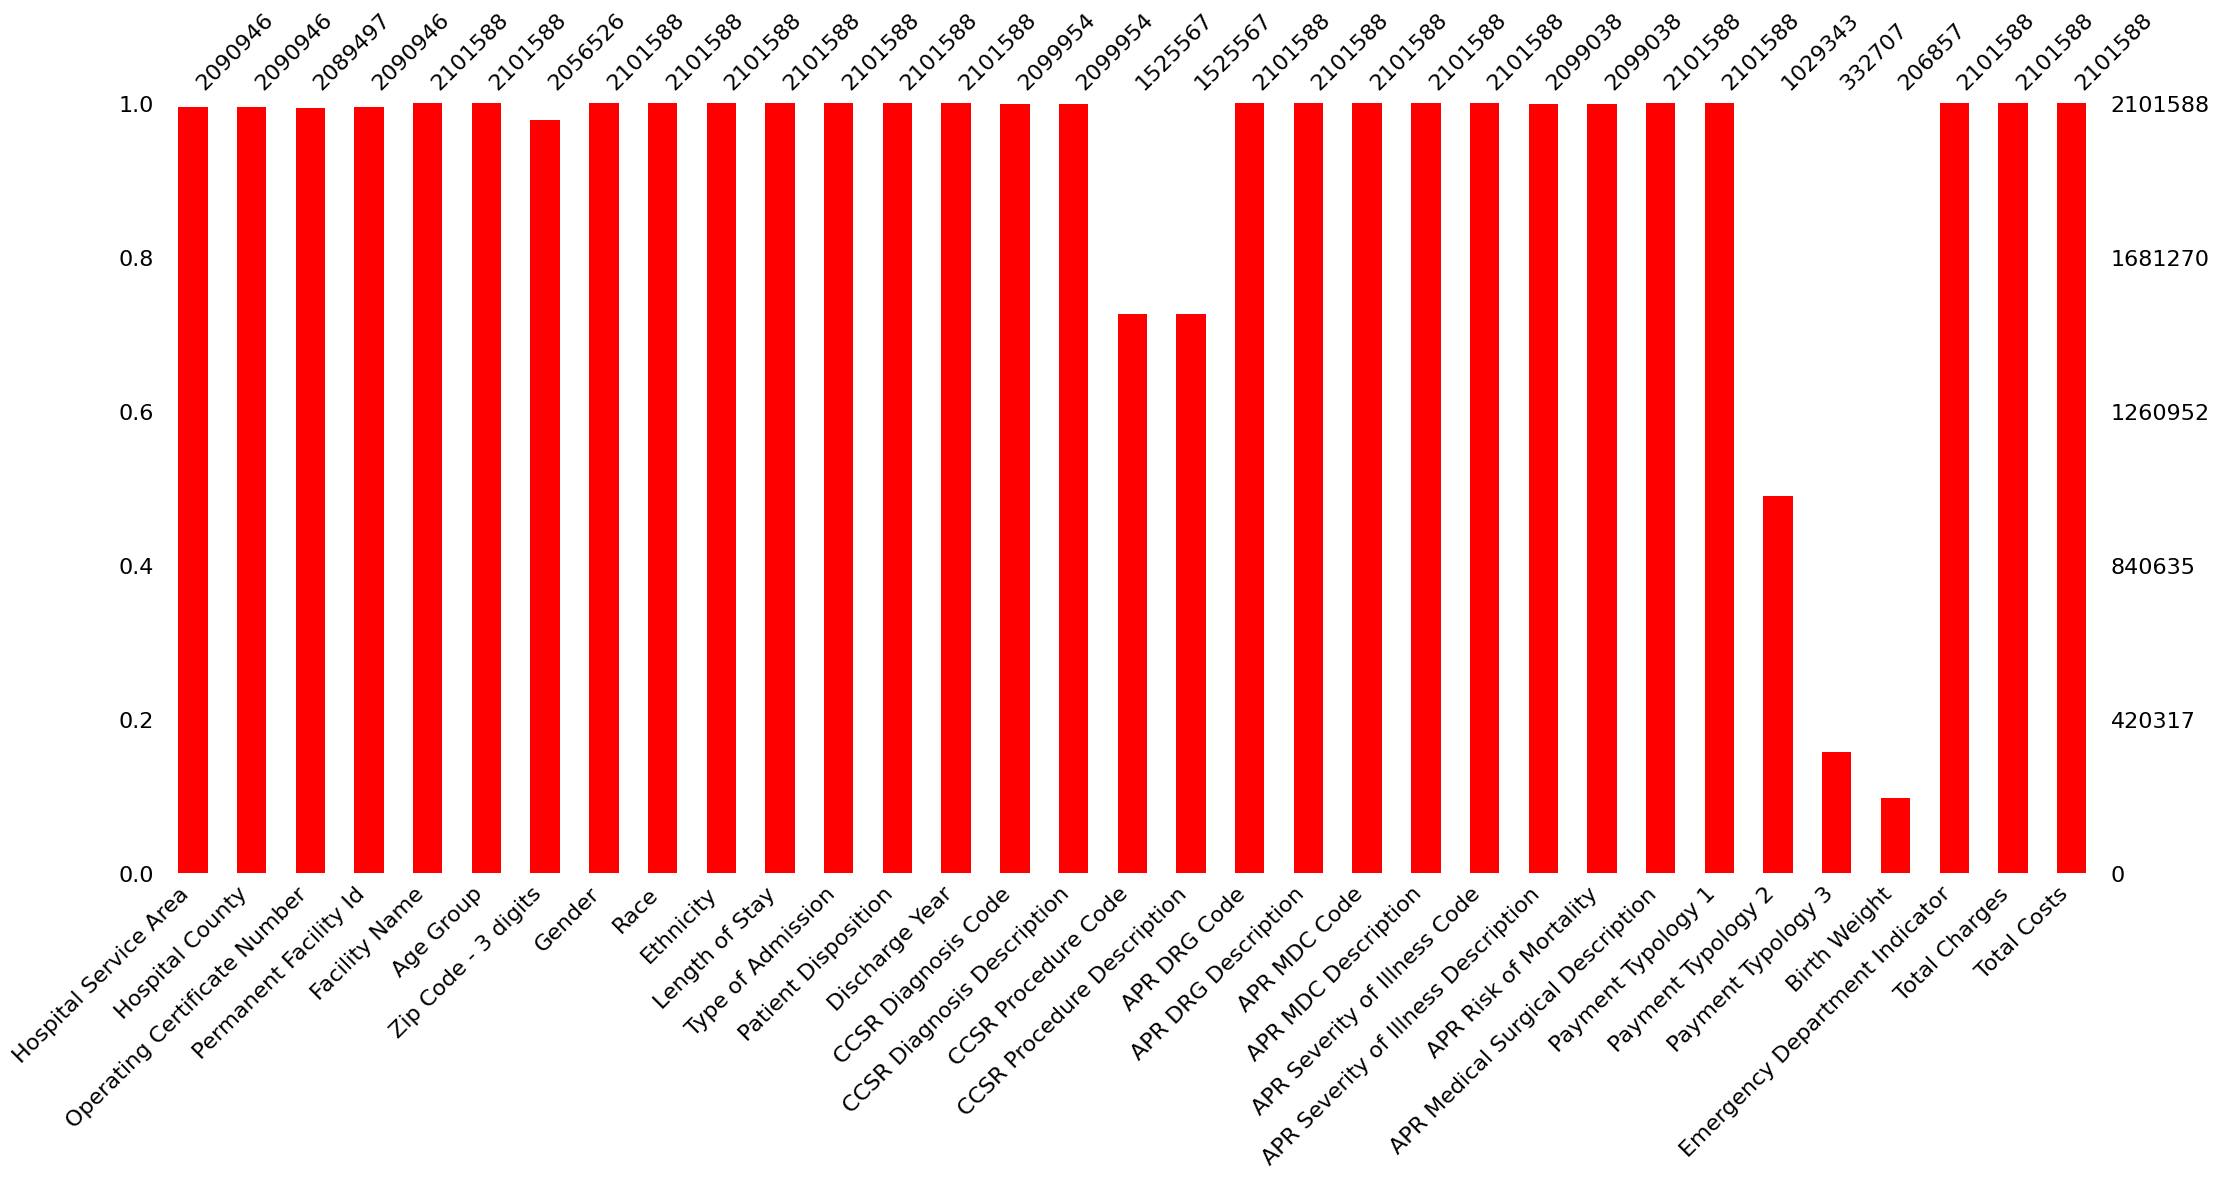

In [12]:
import missingno as msno
msno.bar(df, color = "red")

In [13]:
for column in df.columns:
    unique_values = len(df[column].unique())
    print(f"Number of unique values in {column}: {unique_values}")

Number of unique values in Hospital Service Area: 9
Number of unique values in Hospital County: 58
Number of unique values in Operating Certificate Number: 169
Number of unique values in Permanent Facility Id: 206
Number of unique values in Facility Name: 205
Number of unique values in Age Group: 5
Number of unique values in Zip Code - 3 digits: 51
Number of unique values in Gender: 3
Number of unique values in Race: 4
Number of unique values in Ethnicity: 4
Number of unique values in Length of Stay: 120
Number of unique values in Type of Admission: 6
Number of unique values in Patient Disposition: 19
Number of unique values in Discharge Year: 1
Number of unique values in CCSR Diagnosis Code: 478
Number of unique values in CCSR Diagnosis Description: 478
Number of unique values in CCSR Procedure Code: 321
Number of unique values in CCSR Procedure Description: 321
Number of unique values in APR DRG Code: 334
Number of unique values in APR DRG Description: 334
Number of unique values in 

In [14]:
df = df[df["Patient Disposition"] != "Expired"]

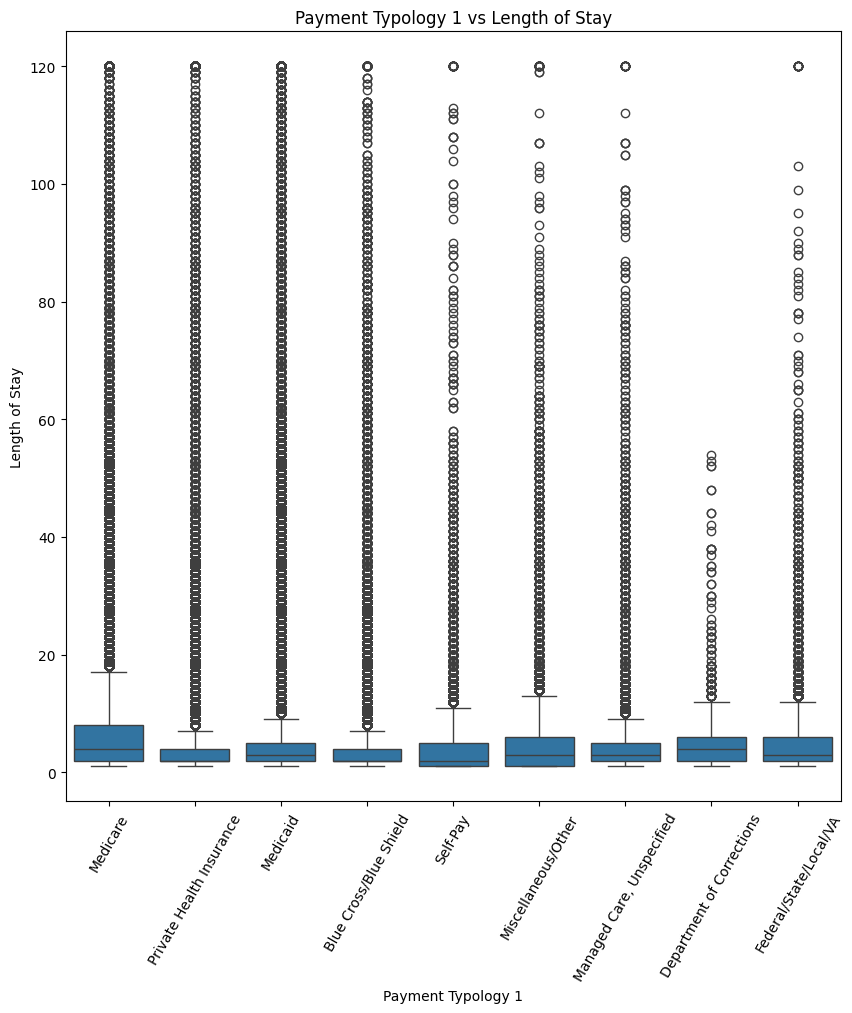

In [15]:
plt.figure(figsize=(10,10))
sns.boxplot(x = "Payment Typology 1", y = "Length of Stay", data=df)
plt.title("Payment Typology 1 vs Length of Stay")
plt.xticks(rotation = 60)
plt.show()

Text(0.5, 1.0, 'Medicare Partients for Age Group')

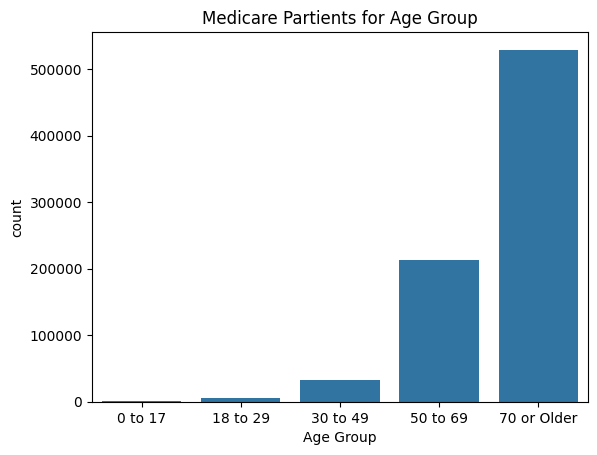

In [16]:
sns.countplot(x = "Age Group", data = df[df["Payment Typology 1"] == "Medicare"], order = ["0 to 17", "18 to 29", "30 to 49", "50 to 69", "70 or Older"])
plt.title("Medicare Partients for Age Group")

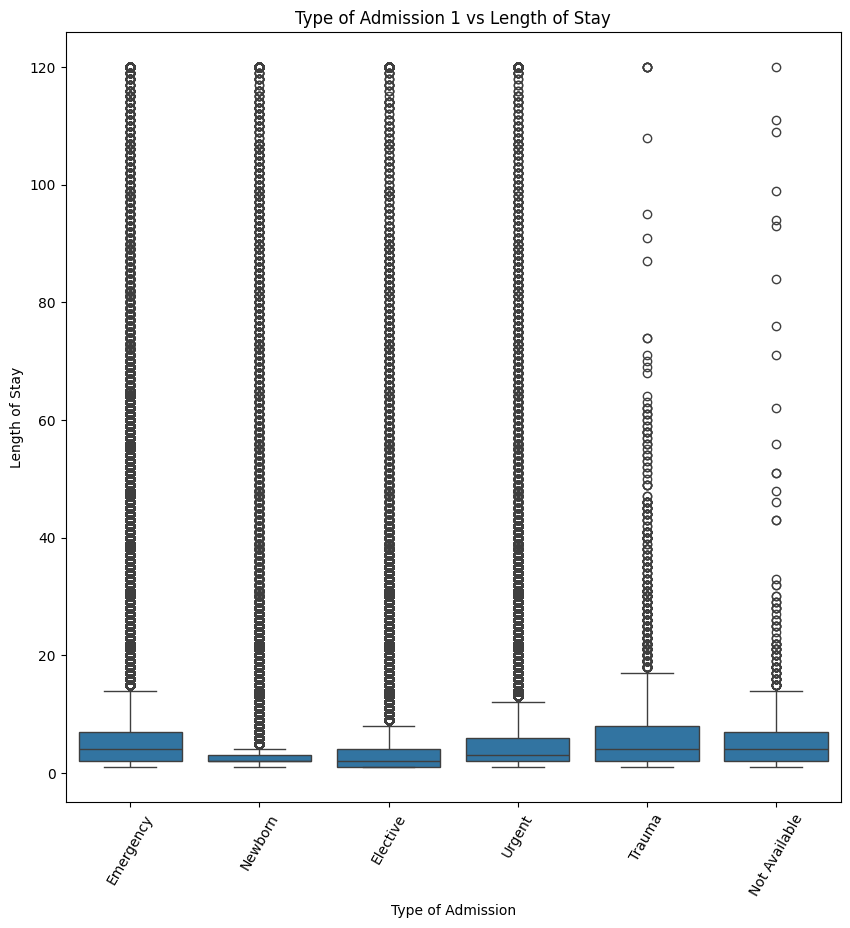

In [17]:
plt.figure(figsize=(10,10))
sns.boxplot(x = "Type of Admission", y = "Length of Stay", data=df)
plt.title("Type of Admission 1 vs Length of Stay")
plt.xticks(rotation = 60)
plt.show()

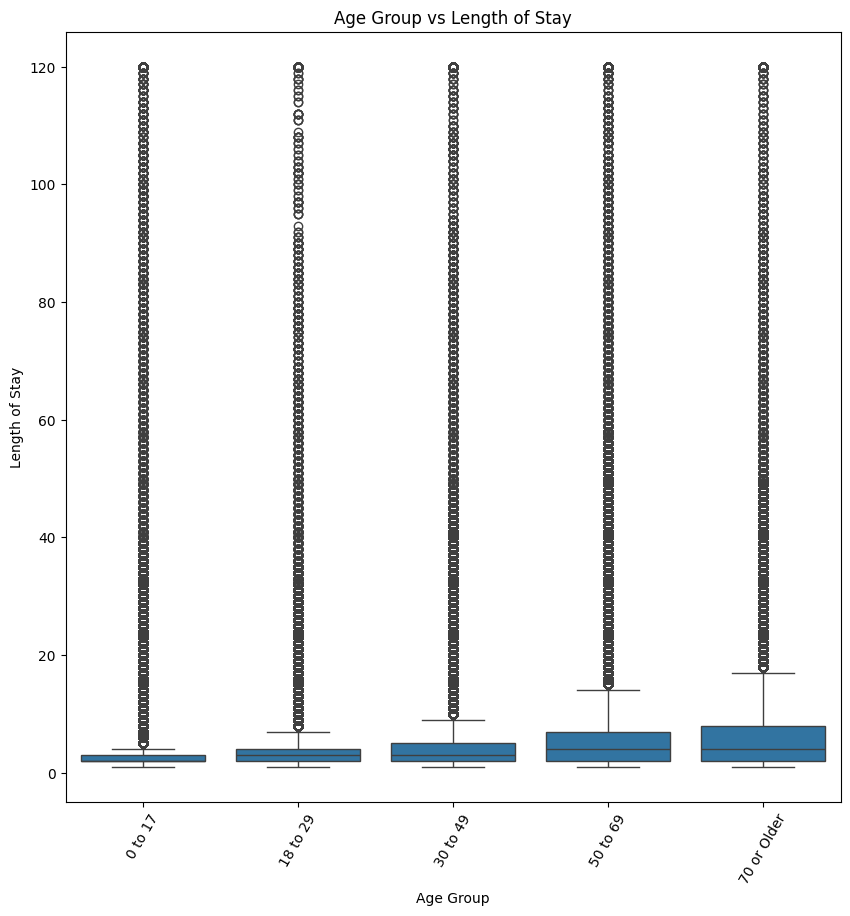

In [18]:
plt.figure(figsize=(10,10))
sns.boxplot(x = "Age Group", y = "Length of Stay", data=df, order = ["0 to 17", "18 to 29", "30 to 49", "50 to 69", "70 or Older"])
plt.title("Age Group vs Length of Stay")
plt.xticks(rotation = 60)
plt.show()

In [19]:
df.columns

Index(['Hospital Service Area', 'Hospital County',
       'Operating Certificate Number', 'Permanent Facility Id',
       'Facility Name', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'Discharge Year', 'CCSR Diagnosis Code',
       'CCSR Diagnosis Description', 'CCSR Procedure Code',
       'CCSR Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Payment Typology 2', 'Payment Typology 3', 'Birth Weight',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

In [20]:
df = df.drop(["Hospital Service Area", "Hospital County", "Operating Certificate Number", "Facility Name", "Zip Code - 3 digits",
             "Patient Disposition", "Discharge Year", "CCSR Diagnosis Description", "CCSR Procedure Description", "APR DRG Description",
             "APR MDC Description", "APR Severity of Illness Description", "Payment Typology 2", "Payment Typology 3", "Birth Weight", "Total Charges", "Total Costs"], axis = 1)

In [21]:
age_group_index = {"0 to 17":1, "18 to 29":2, "30 to 49":3, "50 to 69":4, "70 or Older":5}
gender_index = {"U":0, "F":1, "M":2}
risk_and_severity_index = {np.nan:0, "Minor":1, "Moderate":2, "Major":3, "Extreme":4}

In [22]:
df["Age Group"] = df["Age Group"].apply(lambda x: age_group_index.get(x, 0))
df["Gender"] = df["Gender"].apply(lambda x: gender_index.get(x, 0))
df["APR Risk of Mortality"] = df["APR Risk of Mortality"].apply(lambda x: risk_and_severity_index.get(x, 0))

In [23]:
df["Age Group"]

,Age Group
0,5
1,4
2,2
3,5
4,4
...,...
2101583,2
2101584,4
2101585,3
2101586,4


In [24]:
encoder = OrdinalEncoder()
df["Race"] = encoder.fit_transform(np.asarray(df["Race"]).reshape(-1,1))
df["Ethnicity"] = encoder.fit_transform(np.asarray(df["Ethnicity"]).reshape(-1,1))
df["Type of Admission"] = encoder.fit_transform(np.asarray(df["Type of Admission"]).reshape(-1,1))
df["CCSR Diagnosis Code"] = encoder.fit_transform(np.asarray(df["CCSR Diagnosis Code"]).reshape(-1,1))
df["CCSR Procedure Code"] = encoder.fit_transform(np.asarray(df["CCSR Procedure Code"]).reshape(-1,1))
df["APR Medical Surgical Description"] = encoder.fit_transform(np.asarray(df["APR Medical Surgical Description"]).reshape(-1,1))
df["Payment Typology 1"] = encoder.fit_transform(np.asarray(df["Payment Typology 1"]).reshape(-1,1))
df["Emergency Department Indicator"] = encoder.fit_transform(np.asarray(df["Emergency Department Indicator"]).reshape(-1,1))

In [25]:
df.columns

Index(['Permanent Facility Id', 'Age Group', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'CCSR Diagnosis Code',
       'CCSR Procedure Code', 'APR DRG Code', 'APR MDC Code',
       'APR Severity of Illness Code', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Emergency Department Indicator'],
      dtype='object')

In [26]:
df.isnull().sum()

,0
Permanent Facility Id,10590
Age Group,0
Gender,0
Race,0
Ethnicity,0
Length of Stay,0
Type of Admission,0
CCSR Diagnosis Code,1614
CCSR Procedure Code,566234
APR DRG Code,0


In [27]:
df = df.drop("CCSR Procedure Code", axis=1)
df = df.dropna(subset=["Permanent Facility Id", "CCSR Diagnosis Code"])

In [28]:
df.isnull().sum()


,0
Permanent Facility Id,0
Age Group,0
Gender,0
Race,0
Ethnicity,0
Length of Stay,0
Type of Admission,0
CCSR Diagnosis Code,0
APR DRG Code,0
APR MDC Code,0


In [29]:
X = df.drop(["Length of Stay"], axis=1)
y = df["Length of Stay"]

In [30]:
X

,Permanent Facility Id,Age Group,Gender,Race,Ethnicity,Type of Admission,CCSR Diagnosis Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator
0,1169.0,5,2,2.0,2.0,1.0,154.0,137,4,3,4,0.0,5.0,1.0
1,1169.0,4,1,3.0,1.0,1.0,377.0,43,1,2,1,0.0,7.0,1.0
2,1168.0,2,1,2.0,2.0,1.0,423.0,540,14,1,1,2.0,4.0,0.0
3,3058.0,5,2,2.0,2.0,1.0,121.0,463,11,3,3,0.0,5.0,1.0
4,1169.0,4,1,0.0,1.0,1.0,380.0,58,1,2,1,0.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101583,866.0,2,1,3.0,1.0,0.0,430.0,560,14,1,1,0.0,7.0,0.0
2101584,1045.0,4,2,1.0,3.0,1.0,447.0,137,4,3,3,0.0,4.0,1.0
2101585,1464.0,3,2,3.0,1.0,0.0,12.0,163,5,2,1,2.0,7.0,0.0
2101586,1692.0,4,1,2.0,2.0,1.0,28.0,194,5,2,1,0.0,4.0,1.0


In [31]:
y

,Length of Stay
0,27
1,4
2,2
3,5
4,3
...,...
2101583,1
2101584,13
2101585,7
2101586,2


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [33]:
#overfitting
dtr = DecisionTreeRegressor(max_depth = 10)
dtr.fit(X_train, y_train)
train_prediction = dtr.predict(X_train)
test_prediction = dtr.predict(X_test)
print("RMSE: Train: ", np.sqrt(mean_squared_error(y_train, train_prediction)))
print("RMSE: Test: ", np.sqrt(mean_squared_error(y_test, test_prediction)))

RMSE: Train:  6.088278470926022
RMSE: Test:  6.241141942764074


In [34]:
bins = [0, 5, 10, 20, 30, 50, 120]
labels = [5, 10, 20, 30 ,50, 120]
df["los_bin"] = pd.cut(x=df["Length of Stay"], bins=bins)
df["los_label"] = pd.cut(x=df["Length of Stay"], bins=bins, labels=labels)
df_ = df.head(50)
df["los_bin"] = df["los_bin"].apply(lambda x: str(x).replace(",","-"))
df["los_bin"] = df["los_bin"].apply(lambda x: str(x).replace("120","120+"))

<Axes: xlabel='los_bin', ylabel='count'>

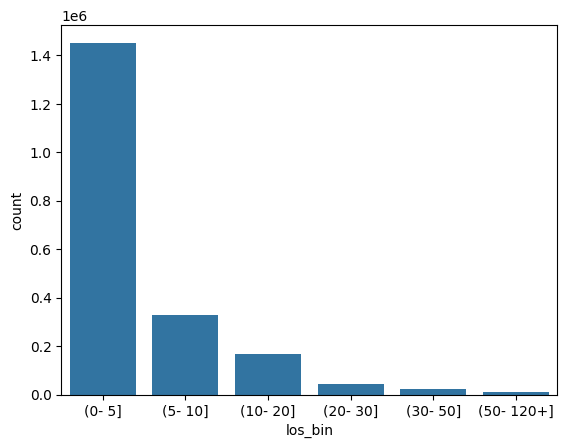

In [35]:
f,ax = plt.subplots()
sns.countplot(x = "los_bin", data=df)

In [36]:
new_X = df.drop(["Length of Stay", "los_bin", "los_label"], axis=1)
new_y = df["los_label"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42)

In [38]:
dtc = DecisionTreeClassifier(max_depth=10)
dtc.fit(X_train, y_train)
train_prediction = dtc.predict(X_train)
test_prediction = dtc.predict(X_test)

In [39]:
print("Train Accuracy: ", accuracy_score(y_train, train_prediction))
print("Test Accuracy: ", accuracy_score(y_test, test_prediction))
print("Classification Report: ", classification_report(y_test, test_prediction))

Train Accuracy:  0.7418194070663043
Test Accuracy:  0.7410673071464011
Classification Report:                precision    recall  f1-score   support

           5       0.80      0.96      0.87    290828
          10       0.36      0.18      0.24     65845
          20       0.37      0.23      0.28     33085
          30       0.52      0.05      0.09      8771
          50       0.35      0.06      0.10      4363
         120       0.54      0.27      0.36      2221

    accuracy                           0.74    405113
   macro avg       0.49      0.29      0.32    405113
weighted avg       0.68      0.74      0.69    405113

